# What is the probability that core PSD rises by >2x as a function of maximum seed PSD
This uses the data from Boyd et al 2016 Figure 5 left.

Boyd, A. J., H. E. Spence, C‐L. Huang, G. D. Reeves, D. N. Baker, D. L. Turner, S. G. Claudepierre, J. F. Fennell, J. B. Blake, and Y. Y. Shprits. "Statistical properties of the radiation belt seed population." Journal of Geophysical Research: Space Physics (2016).

http://onlinelibrary.wiley.com/doi/10.1002/2016JA022652/full


<img src="boyd_2106_figure_5.png">

## Method
Using a statistical model of the relationship between the change of Core PSD being >2x. 

We model the number of Core PSD events being >2x as a random sample from a binomial distribution, where a success is >x2 and failure is <2x.

We are to belive that the increase is dependent on the log of the maximum seed poopulation. 



$
change \sim Bin(n,p) \\
logit(p) = \alpha + \beta x \\
a \sim N(0,5) \\
\beta \sim N(0,10)
$


where we set vague priors for $\alpha$ and $\beta$, the parameters for the logistic model.

This is the same technique used in the estimation of deaths due to a concentration of a chemical.

In [1]:
# http://onlinelibrary.wiley.com/doi/10.1002/2016JA022652/epdf


import pymc
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import spacepy.plot as spp

This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Data we manually extracted by clicking on the plot

In [2]:
# fogure 5 left

data = np.asarray([1.3510754E-5,0.19167218,
1.3095075E-5, 0.35914207,
1.7969156E-5, 0.5315465,
2.2680122E-5, 1.088768,
2.658636E-5, 0.8725469,
2.1551059E-5, 0.37572044,
2.4141058E-5, 0.32416967,
2.7690547E-5, 0.15037514,
3.138562E-5, 0.9466703,
4.2754244E-5, 1.2086405,
4.828105E-5, 0.7589996,
5.0161325E-5, 0.5774985,
3.9698883E-5, 0.5401454,
6.525233E-5, 1.1917208,
9.534515E-5, 0.41458386,
9.037694E-5, 0.6177862,
8.269145E-5, 0.22119954,
7.3339E-5, 0.13988428,
8.5937325E-5, 0.14095742,
1.252545E-4, 0.21971767,
1.4911826E-4, 0.14004362,
1.745245E-4, 0.2889438,
3.0742266E-4, 0.29788056,
3.4140234E-4, 0.49602887,
6.10676E-4, 0.44113842,
6.0555077E-4, 0.7453803,
3.8783226E-4, 0.81389874,
2.741248E-4, 0.68632746,
2.680259E-4, 0.62807685,
2.121458E-4, 0.54966176,
1.79686E-4, 0.5414554,
1.5327778E-4, 0.69589466,
2.2869675E-4, 0.686128,
2.1195684E-4, 0.9356477,
1.1749988E-4, 1.7908369,
2.4633156E-4, 1.4154592,
3.088986E-4, 1.547241,
5.2398414E-4, 1.5600363,
6.370312E-4, 2.7159016,
4.570722E-4, 2.4118235,
4.6060426E-4, 2.207232,
3.7848152E-4, 2.3236525,
3.2301247E-4, 2.2388134,
2.8843267E-4, 2.2219303,
3.0629092E-4, 2.6927452,
2.1488604E-4, 2.124584,
1.3252324E-4, 2.3717327,
9.4346244E-5, 2.459642,
1.4278099E-4, 4.158814,
2.0521968E-4, 3.285094,
2.9920225E-4, 4.2570686,
3.4014977E-4, 4.4509373,
6.175848E-4, 4.389852,
6.759791E-4, 5.089608,
7.91336E-4, 9.125814,
4.80572E-4, 12.163501,
4.4243436E-4, 9.816401,
3.7477125E-4, 9.182468,
3.2482846E-4, 7.141151,
2.8556274E-4, 9.594481,
2.1116872E-4, 8.6475115,
2.8320463E-4, 14.946182,
3.6879437E-4, 16.459846,
5.023681E-4, 21.327564,
3.4694388E-4, 24.708984,
3.7682228E-4, 32.004616,
5.4524664E-4, 42.090816,
])
data = data.reshape((-1,2))
seed = np.log10(data[:,0])
change = data[:,1]
change_bin = (change > 2).astype(int)
# need to compute a probability of change in max seed bins
seed_bins = np.linspace(np.log10(1e-5),np.log10(1e-3), 10)
seed_digs = np.digitize(seed, seed_bins)
seed_bins_centers = np.diff(seed_bins)/2 + seed_bins[:-1]

print('seed_bins_centers', len(seed_bins_centers), seed_bins_centers)
print(seed_digs)
n_pts = []
for v in np.unique(seed_digs):
    n_pts.append((v, (seed_digs==v).sum() ))
print('n_pts', n_pts)
successes = []
for ind,v in n_pts:
    mask = seed_digs == ind
    successes.append(change_bin[mask].sum())
    

print('successes', len(successes), successes)

n_pts = np.asarray([v[1] for v in n_pts])
print('n_pts', len(n_pts), n_pts)
seed_bins_centers = seed_bins_centers[seed_digs.min()-1:]


seed_bins_centers 9 [-4.88888889 -4.66666667 -4.44444444 -4.22222222 -4.         -3.77777778
 -3.55555556 -3.33333333 -3.11111111]
[1 1 2 2 2 2 2 2 3 3 4 4 3 4 5 5 5 4 5 5 6 6 7 7 9 9 8 7 7 6 6 6 7 6 5 7 7
 8 9 8 8 8 7 7 7 6 6 5 6 6 7 7 9 9 9 8 8 8 7 7 6 7 8 8 7 8 8]
n_pts [(1, 2), (2, 6), (3, 3), (4, 4), (5, 7), (6, 11), (7, 16), (8, 12), (9, 6)]
successes 9 [0, 0, 0, 0, 1, 5, 9, 10, 4]
n_pts 9 [ 2  6  3  4  7 11 16 12  6]


## Oberved Data:
* n_pts : the number of points in each of the 10 log spaced Maximum Seed PSD bins
* successes : the number of events in each Maximum Seed PSD bins where the increase was >2x
* seed_bins_centers : the centers of the Maximum Seed PSD bins

In [3]:
# define invlogit function
def invlogit(x):
    return pymc.exp(x) / (1 + pymc.exp(x))

Setup the Bayesian model accorind to the description above. Run the Markov chain monte carlo (MCMC) to sample the posterior distributions for $\alpha$ and $\beta$

In [4]:
# define priors
# these are wide uninformative priors
# alpha = pymc.Normal('alpha', mu=0, tau=1.0/5**2)
# beta = pymc.Normal('beta', mu=0, tau=1.0/10**2)
alpha = pymc.Uniform('alpha', 0,40)
beta = pymc.Uniform('beta', 0,40)


# define likelihood
p = pymc.InvLogit('p', alpha + beta*seed_bins_centers)
print('n_pts', n_pts, 'p', p, 'successes', successes, )

y = pymc.Binomial('y_obs', n=n_pts, p=p, value=successes, observed=True)

# inference
m = pymc.Model([alpha, beta, y])
mc = pymc.MCMC(m)
mc.sample(iter=501000, burn=1000, burn_till_tuned=True, thin=80)

n_pts [ 2  6  3  4  7 11 16 12  6] p p successes [0, 0, 0, 0, 1, 5, 9, 10, 4]
 [-----------------103%------------------] 523655 of 505000 complete in 57.5 sec

Make diagnostic plots of the posteriour distributions as created using MCMC.   

Plotting beta
Plotting alpha


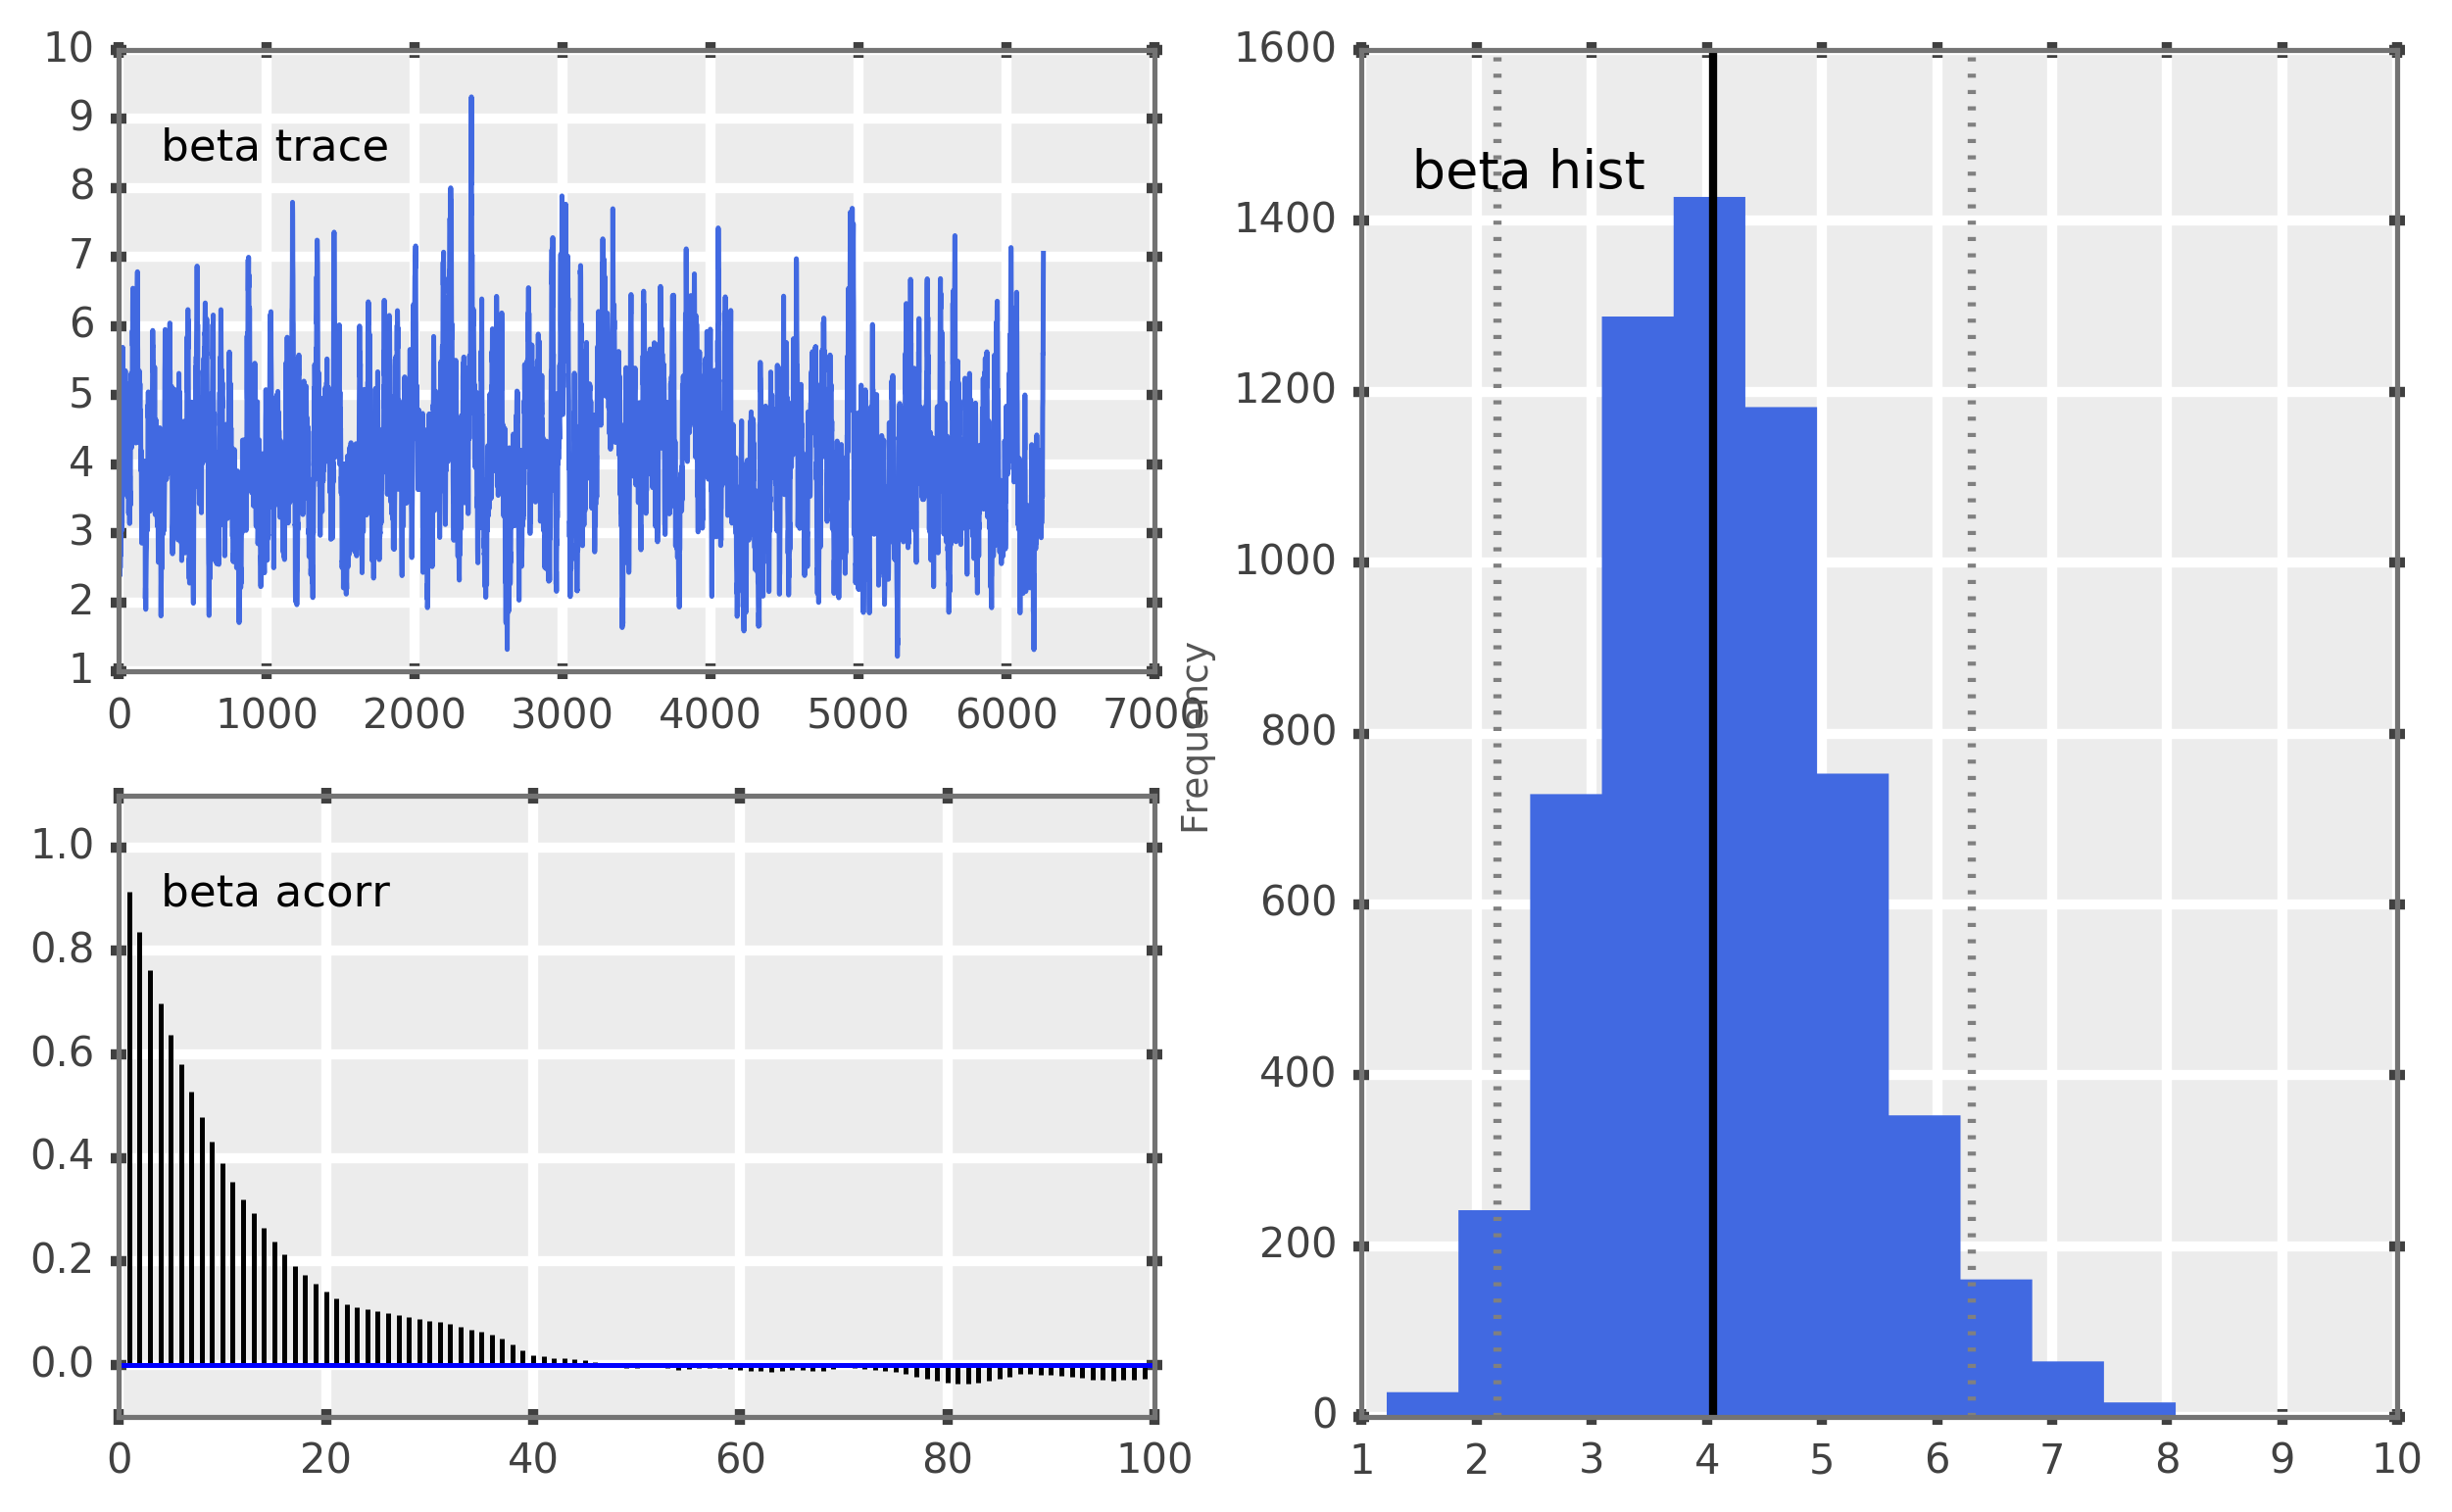

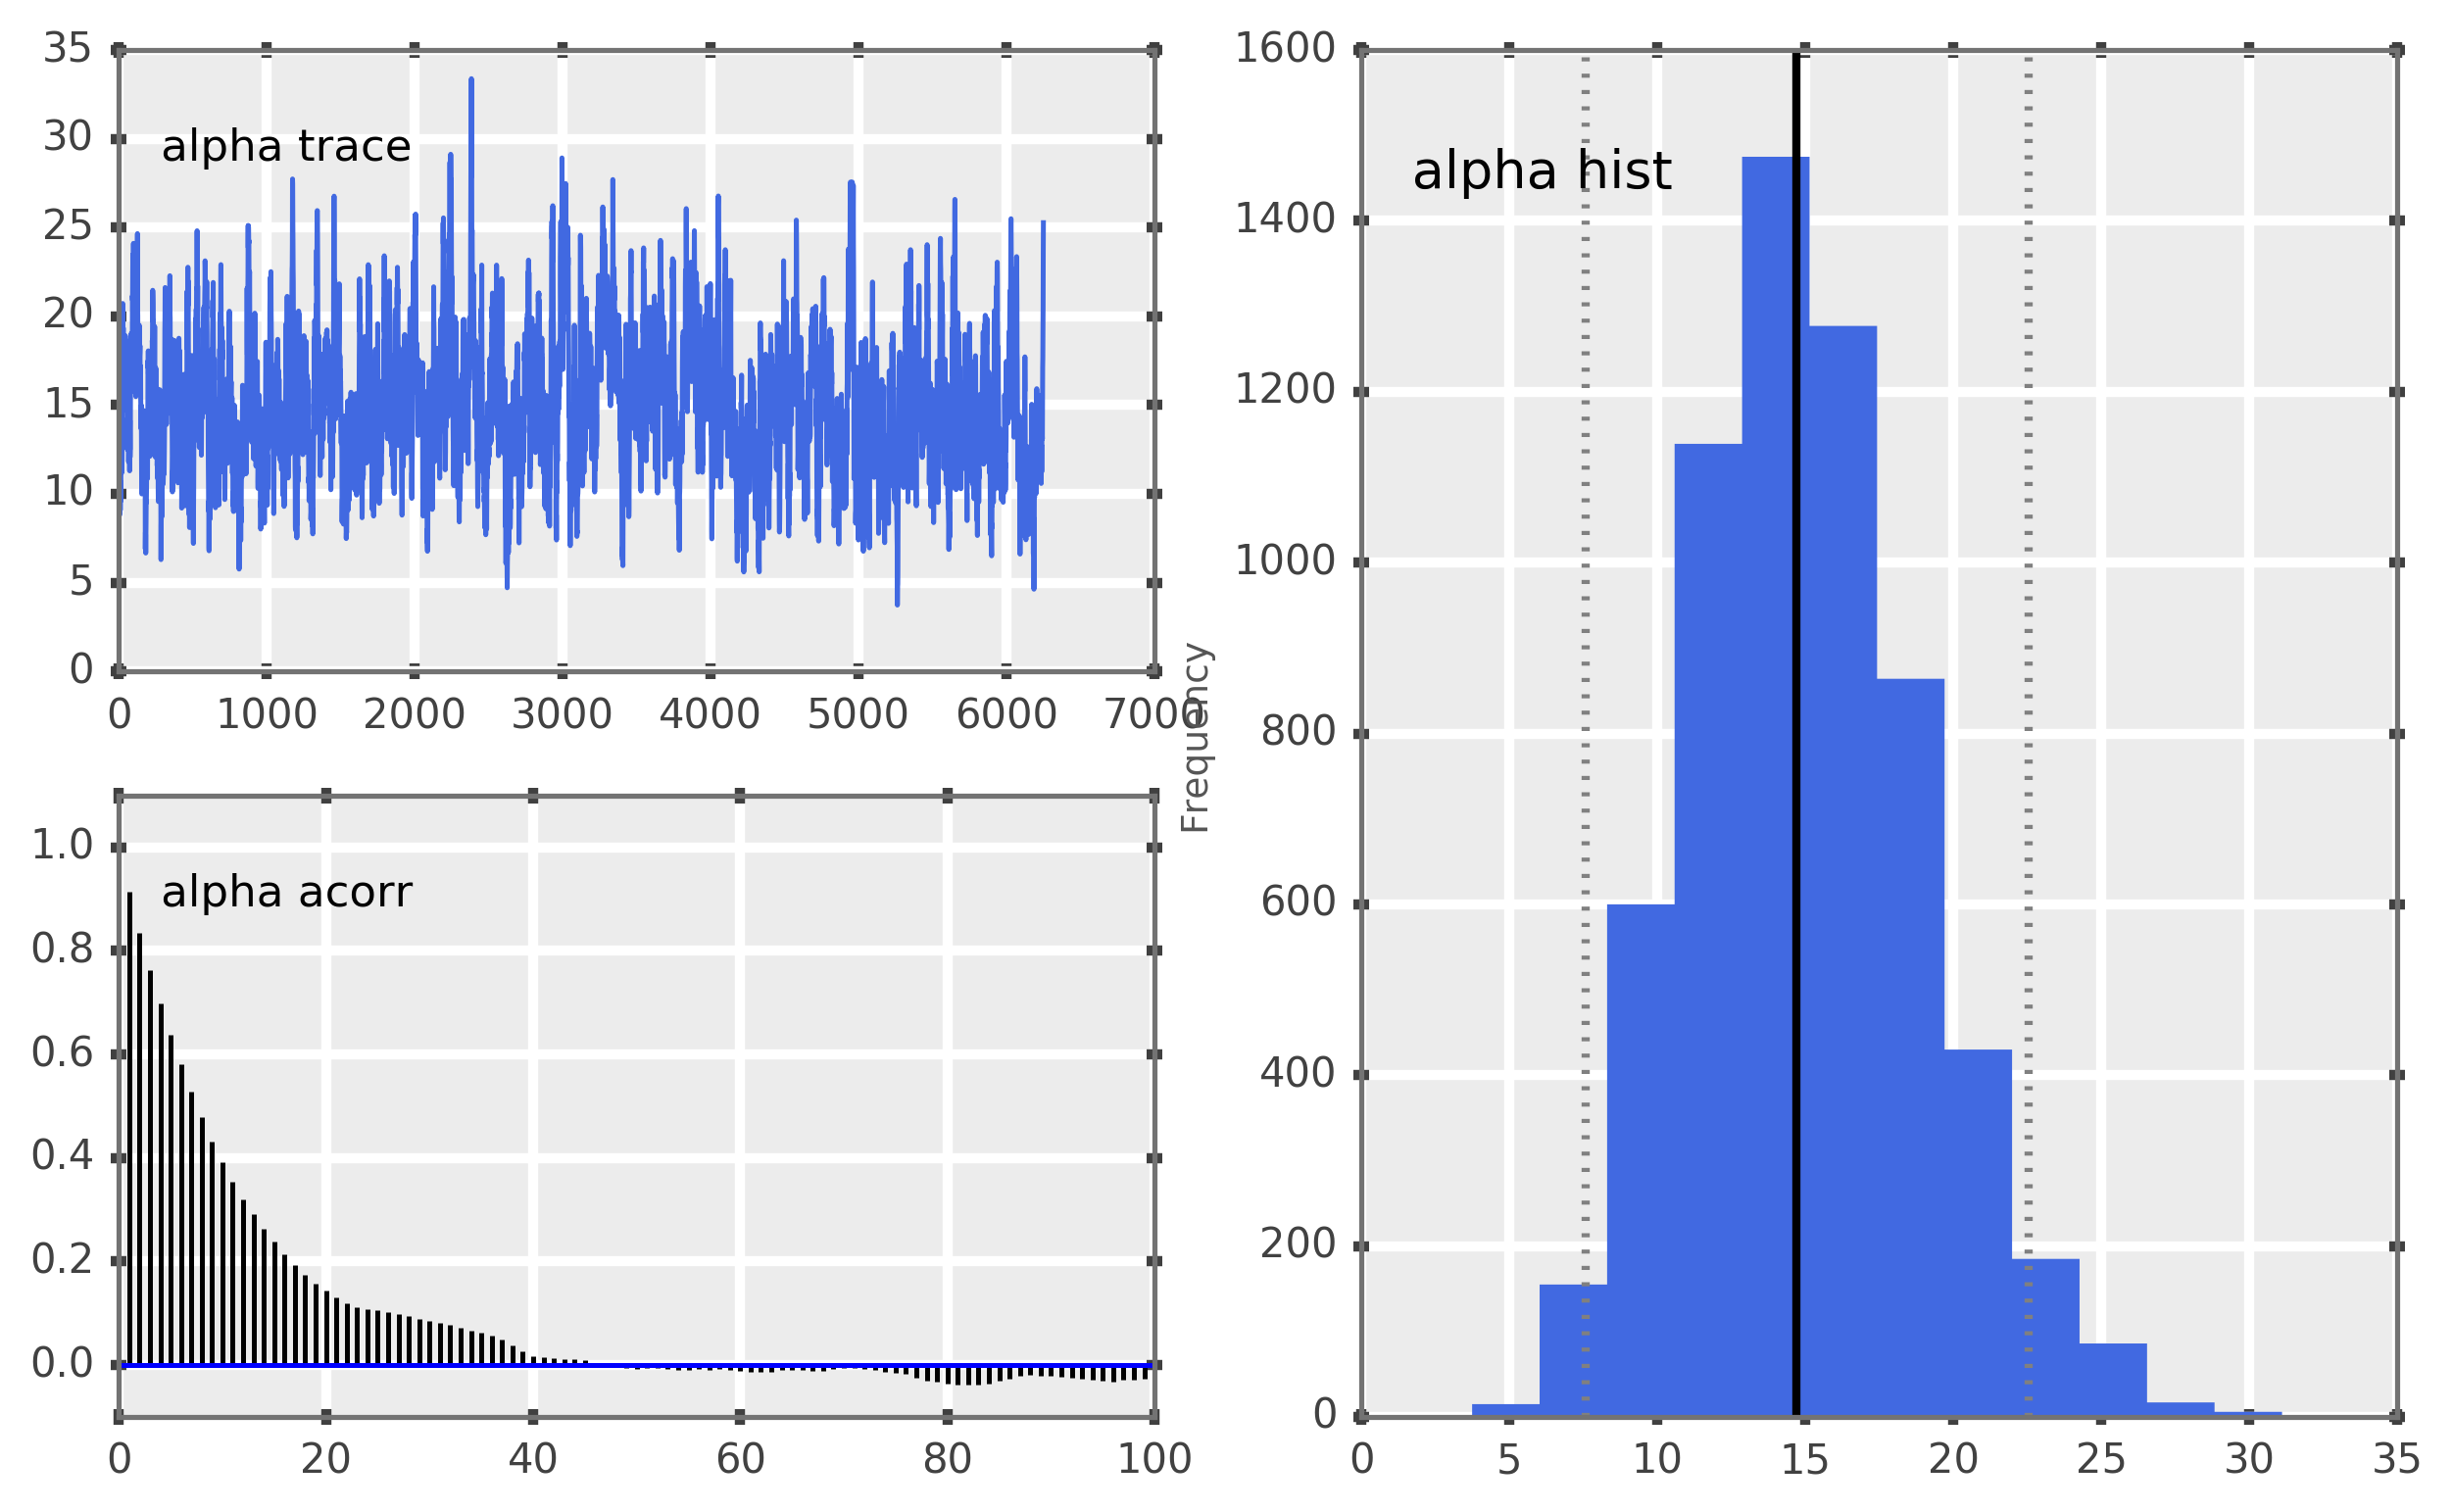

In [5]:
pymc.Matplot.plot(mc)

In [6]:
pprint(mc.stats())

{'alpha': {'95% HPD interval': array([  7.58317624,  22.55302905]),
           'mc error': 0.21615189696471804,
           'mean': 14.998546832503889,
           'n': 6250,
           'quantiles': {2.5: 8.2008236316031926,
                         25: 12.227229829208106,
                         50: 14.705448155178029,
                         75: 17.466999861264743,
                         97.5: 23.358711686321584},
           'standard deviation': 3.8756707272251627},
 'beta': {'95% HPD interval': array([ 2.1804026 ,  6.30103176]),
          'mc error': 0.059596498408166609,
          'mean': 4.1469747404541017,
          'n': 6250,
          'quantiles': {2.5: 2.2879642671748766,
                        25: 3.3864665253673745,
                        50: 4.0578102410262673,
                        75: 4.8283728735447378,
                        97.5: 6.4757506362629398},
          'standard deviation': 1.0689772228613661}}


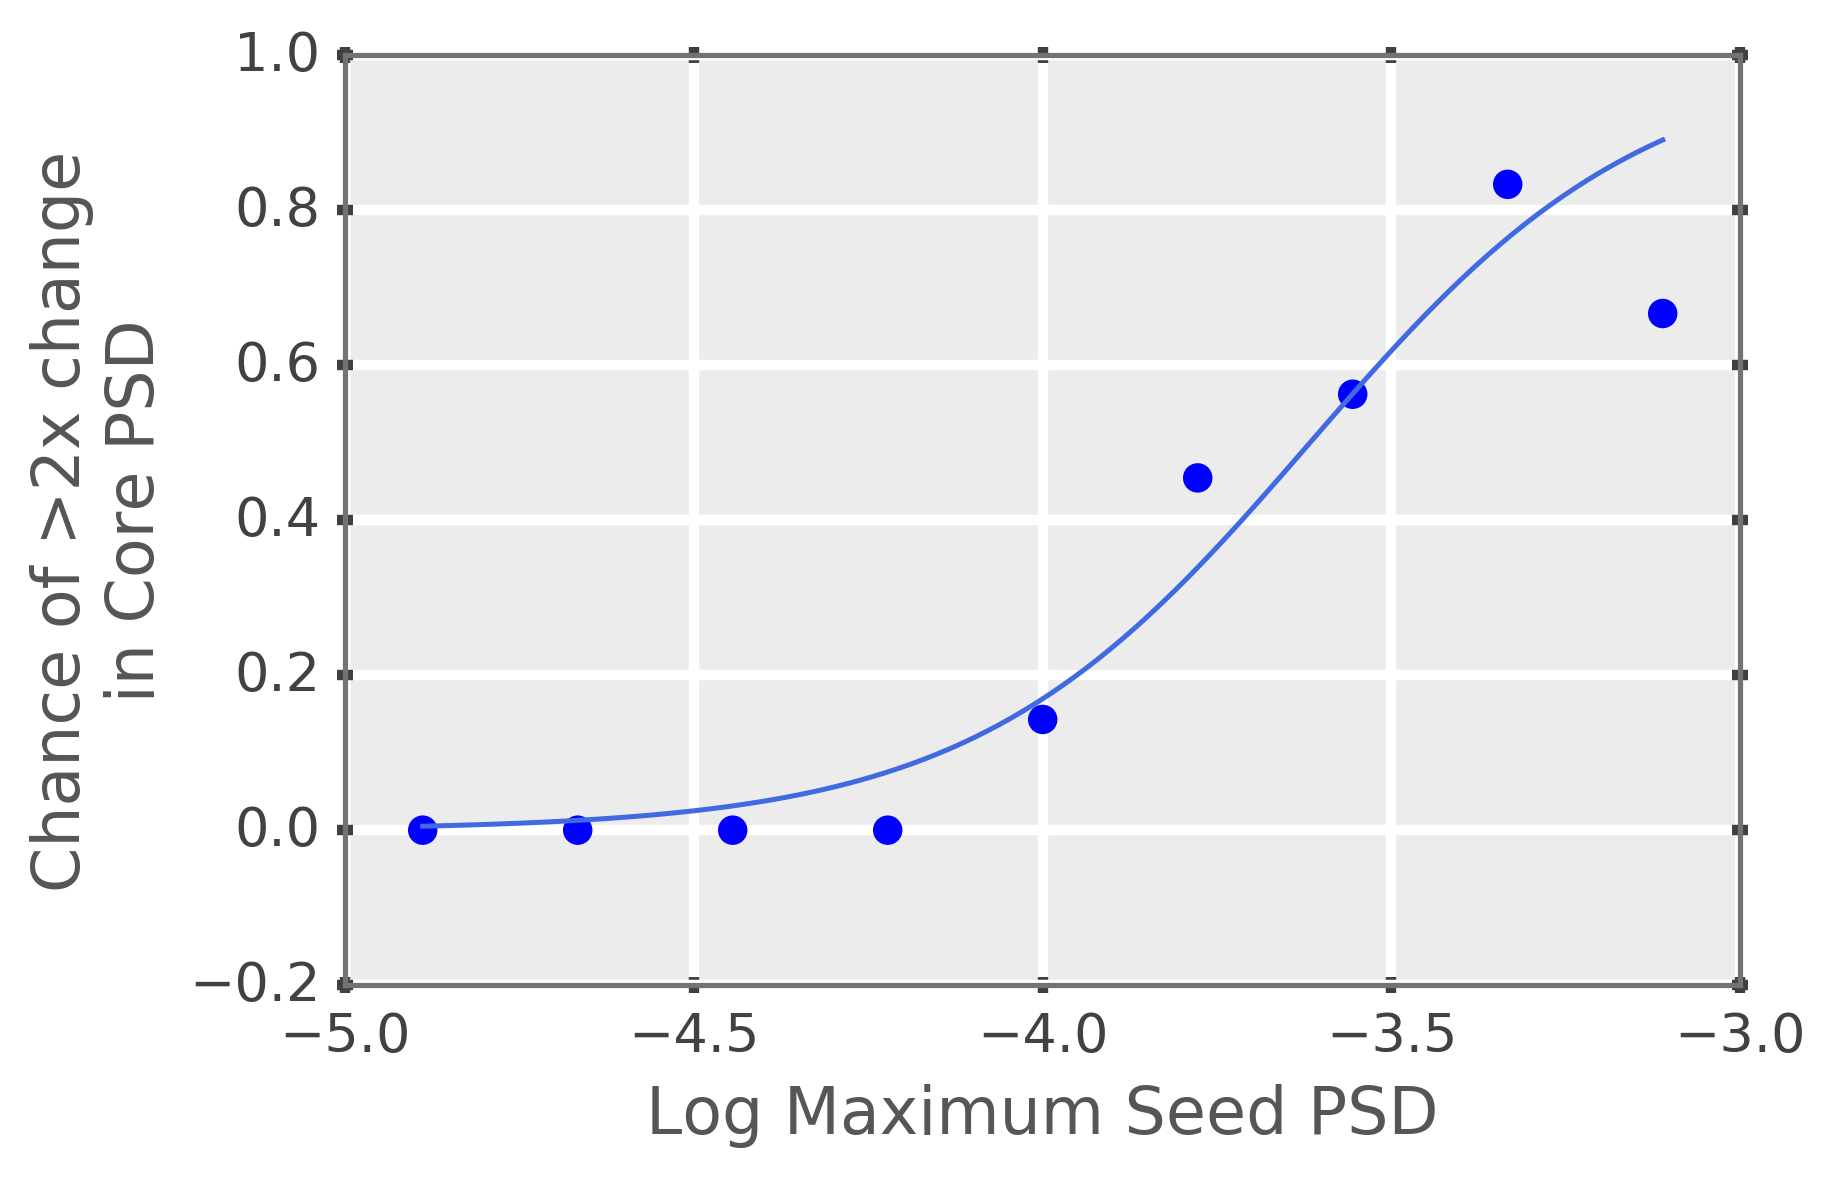

In [7]:
xp = np.linspace(seed_bins_centers.min(), seed_bins_centers.max(), 100)
a = alpha.stats()['mean']
b = beta.stats()['mean']
plt.plot(xp, invlogit(a + b*xp).value)
plt.scatter(seed_bins_centers, successes/n_pts, s=50);
plt.xlabel('Log Maximum Seed PSD')
plt.ylabel('Chance of >2x change\n in Core PSD')
plt.gca().ticklabel_format(useOffset=False)


This is the answer. For the collected data there is a weak cutoff in the Maximum Seed PSD where the probability increases. This speaks to the "necessary but not sufficient" nature of the relationship. Other parameters can be added to the model to improve in the "necessary and sufficient" direction as they are theorized. 

Also the deviation between the data and the model at low seed PSD speaks to this being more of a cutoff at the low end than a system with the more seed PSD the greater chance of a Core PSD change. However the model fits well at higher seed PSD which may well inform that once the threshold is met the probability does scale as a Logit system with  binomial probability. 

In [8]:
# one should be able to get estimates of the line uncertainity
ilu = np.empty((1000, len(xp)), dtype=float)
for ii, v in enumerate(np.random.random_integers(0, len(alpha.trace[:])-1, 1000)):
    ilu[ii] = invlogit(alpha.trace[:][v] + beta.trace[:][v]*xp).value


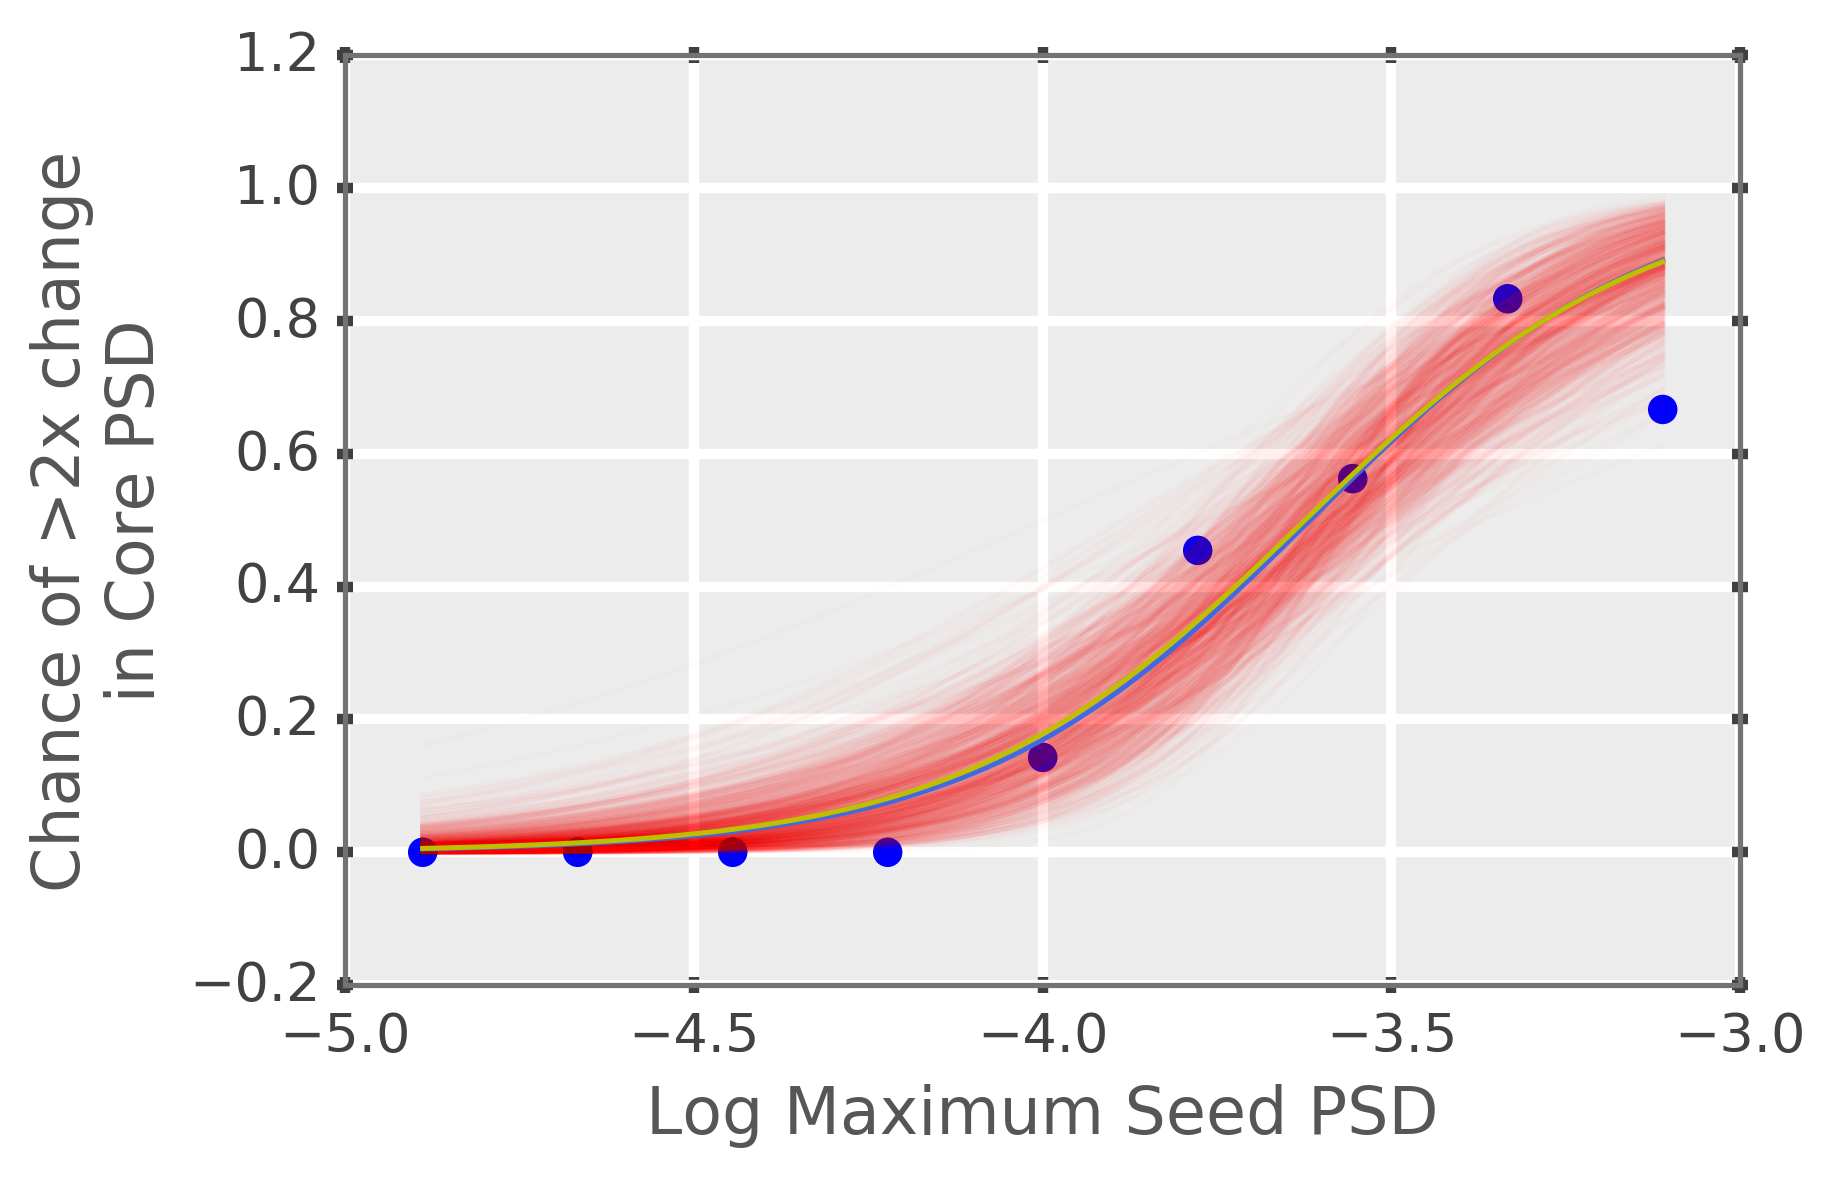

In [9]:
xp = np.linspace(seed_bins_centers.min(), seed_bins_centers.max(), 100)
for v in ilu:
    plt.plot(xp, v, alpha=.01, c='r')


a = alpha.stats()['mean']
b = beta.stats()['mean']
plt.plot(xp, invlogit(a + b*xp).value)

a = alpha.stats()['quantiles'][50]
b = beta.stats()['quantiles'][50]
plt.plot(xp, invlogit(a + b*xp).value, c='y')


plt.scatter(seed_bins_centers, successes/n_pts, s=50);
plt.xlabel('Log Maximum Seed PSD')
plt.ylabel('Chance of >2x change\n in Core PSD')

Same as pervios figure with the red lines overlayed as 100 joint draws from the model posterior in order to show spread. 